# 넷플릭스 유저 구독 유형과 수익성 분석
- 분석일: 2023.09.24

## 목차

1. [개요](#1.-개요)


2. [데이터 로딩 및 탐색](#2.-데이터-로딩-및-탐색)


3. [구독 유형에 따른 수익 합계](#3.-구독-유형에-따른-수익-합계)


4. [구독 유형에 따른 결제 당 수익](#4.-구독-유형에-따른-결제-당-수익)


5. [국가 별 구독 유형에 따른 수익성](#5.-국가-별-구독-유형에-따른-수익성)

	5-1. [가입자 수](#5-1.-가입자-수)

	5-2. [수익 합계](#5-2.-수익-합계)

	5-3. [수익률 당 가입자 수](#5-3.-수익률-당-가입자-수)


6. [후기](#6.-후기)

## 1. 개요

- 분석 목적: 넷플리스 유저 데이터로부터 **구독 유형에 따른 수익성**을 분석하여 앞으로의 방향성 설정
- 분석 대상: Netflix Userbase Dataset
    - https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset?resource=download
    - 넷플릭스 다양한 국가의 유저 구독 정보를 담은 데이터
- 분석 방법: 시각화를 통한 인사이트 도출

## 2. 데이터 로딩 및 탐색

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기
netflix_df = pd.read_csv('Netflix Userbase.csv', index_col='User ID')
netflix_df

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
User ID,,,,,,,,,
1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...
2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month


In [13]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 1 to 2500
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription Type  2500 non-null   object
 1   Monthly Revenue    2500 non-null   int64 
 2   Join Date          2500 non-null   object
 3   Last Payment Date  2500 non-null   object
 4   Country            2500 non-null   object
 5   Age                2500 non-null   int64 
 6   Gender             2500 non-null   object
 7   Device             2500 non-null   object
 8   Plan Duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 195.3+ KB


총 2500개의 데이터를 가지고 있으며 모든 데이터에 null 값이 존재하지 않는다.

In [18]:
netflix_df.describe()

,Monthly Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


```Monthly Revenue```가 10 ~ 15의 정수인 것으로 보아 단위는 **달러**일 것으로 추측된다.

```Age```는 26 ~ 51의 정수이며 평균은 약 38.8세이다.

In [81]:
netflix_df['Subscription Type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

요금제의 유형은 **Basic, Standard, Premium의 3가지**로 구성되어 있으며, 본 데이터에는 '광고가 포함된 최저가 요금제'는 반영되어 있지 않다.

In [82]:
netflix_df['Country'].nunique()

10

In [88]:
netflix_df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

국가는 **총 10개국**으로 구성되어 있다.

In [164]:
countries = pd.DataFrame(netflix_df.groupby(['Country']).size(), columns=['count'])
countries_df = countries.sort_values(['count', 'Country'], ascending=[False, True]) #데이터 개수 내림차순 -> 국가 이름 오름차순
countries_df

,count
Country,
Spain,451
United States,451
Canada,317
Australia,183
Brazil,183
France,183
Germany,183
Italy,183
Mexico,183


스페인과 미국이 가장 많은 451개의 데이터를 포함하고 있다. 호주, 브라질 등 7개국이 183개의 데이터로 가장 적다.

In [103]:
netflix_df['Plan Duration'].unique()

array(['1 Month'], dtype=object)

넷플릭스의 구독 유형은 전부 **월간 구독**이다.

## 3. 구독 유형에 따른 수익 합계

In [104]:
# 구독 유형에 따른 수익 합계 도출
revenue_by_total_subs_df = netflix_df.groupby('Subscription Type')['Monthly Revenue'].agg(['sum'])
revenue_by_total_subs_df

,sum
Subscription Type,
Basic,12469
Premium,9229
Standard,9573


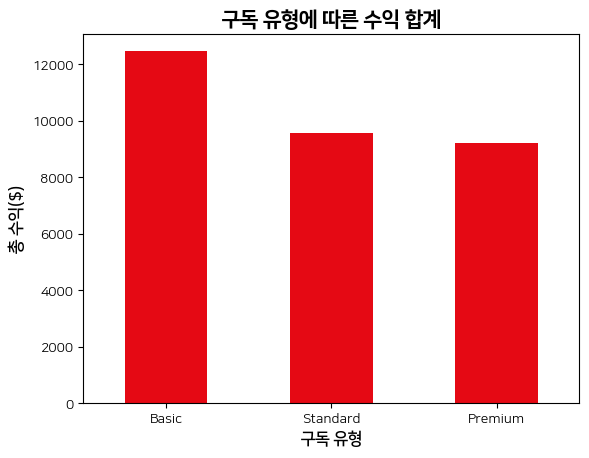

In [105]:
# 폰트 설정
plt.rc('font', family='NanumSquare_ac')

# 그래프 그리기
custom_order = ['Basic', 'Standard', 'Premium'] #막대의 순서(요금제 가격 순)
revenue_by_total_subs_df.loc[custom_order].plot(kind='bar', color='#E50914', legend=False)

# 시각화 설정
plt.title('구독 유형에 따른 수익 합계', fontsize=15, fontweight=900)
plt.ylabel('총 수익($)', fontsize=12, fontweight='bold')
plt.xlabel('구독 유형', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

**Basic 유형의 수익 합계가 가장 많고,** Standard와 Premium은 비슷한 수준으로 보인다.

## 4. 구독 유형에 따른 수익률

In [106]:
# 구독 유형에 따른 수익률(결제 당 수익) 도출
revenue_by_a_payment_df = netflix_df.groupby('Subscription Type')['Monthly Revenue'].agg(['mean'])
revenue_by_a_payment_df

,mean
Subscription Type,
Basic,12.481481
Premium,12.590723
Standard,12.464844


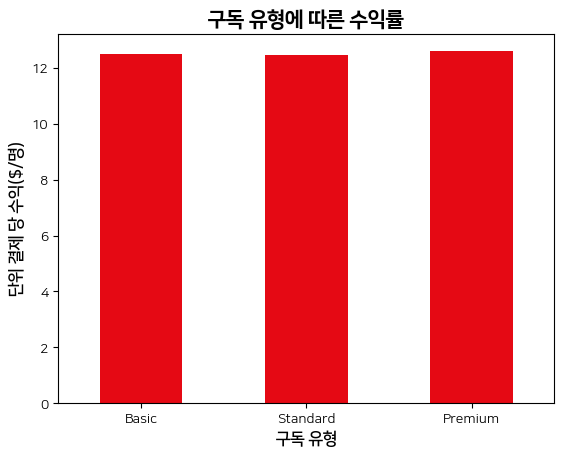

In [276]:
# 그래프 그리기
custom_order = ['Basic', 'Standard', 'Premium'] #막대의 순서(요금제 가격 순)
revenue_by_a_payment_df.loc[custom_order].plot(kind='bar', color='#E50914', legend=False) 

# 시각화 설정
plt.title('구독 유형에 따른 수익률', fontsize=15, fontweight=900)
plt.ylabel('단위 결제 당 수익($/명)', fontsize=12, fontweight='bold')
plt.xlabel('구독 유형', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

의외로 구독 유형에 따른 **차이가 없다.** 한국의 경우를 떠올려 보면 Basic 9500원, Standard 13500원, Premium 17000원으로 책정되어 있기 때문에, 이렇게 큰 차이가 없는 것은 의외의 결과다.

## 5. 국가 별 구독 유형에 따른 수익성

### 5-1. 가입자 수

In [239]:
# 국가 별 구독 유형에 따른 가입자 수 도출
count_by_country = netflix_df.groupby(['Country', 'Subscription Type']).size().unstack(fill_value=0)

# 순서 정렬
custom_col_order = ['Basic', 'Standard', 'Premium'] #요금제 가격 순
count_by_country = count_by_country[custom_col_order]
custom_row_order = list(countries_df.index)
count_by_country = count_by_country.reindex(custom_row_order)

count_by_country

Subscription Type,Basic,Standard,Premium
Country,,,
Spain,110,129,212
United States,199,107,145
Canada,145,84,88
Australia,31,51,101
Brazil,146,4,33
France,36,0,147
Germany,149,31,3
Italy,176,3,4
Mexico,4,179,0


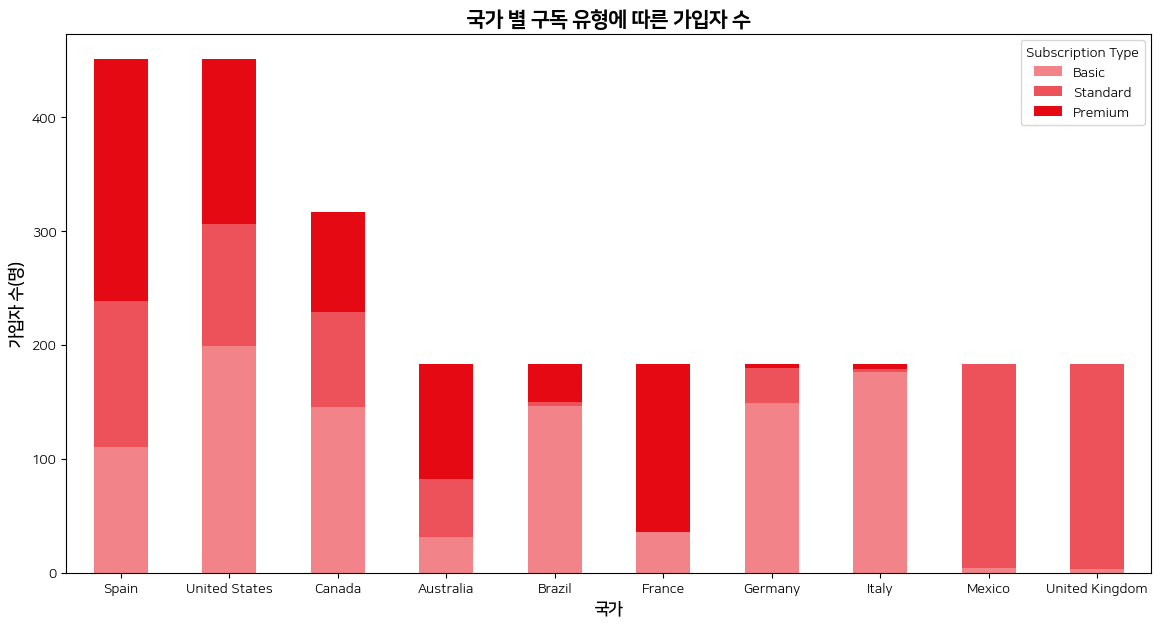

In [240]:
# 그래프 그리기
count_by_country.plot(kind='bar', color=['#F28489', '#ED525A', '#E50914'], stacked=True, figsize=(14, 7))

# 시각화 설정
plt.title('국가 별 구독 유형에 따른 가입자 수', fontsize=15, fontweight=900)
plt.ylabel('가입자 수(명)', fontsize=12, fontweight='bold')
plt.xlabel('국가', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

### 5-2. 수익 합계

In [227]:
# 국가 별 구독 유형에 따른 수익 합계 도출
revenue_by_country = netflix_df.groupby(['Country', 'Subscription Type']).agg({
    'Monthly Revenue': 'sum'
}).unstack(fill_value=0)

# 순서 정렬
custom_col_order = ['Basic', 'Standard', 'Premium'] #요금제 가격 순
revenue_by_country = revenue_by_country.loc[:, 'Monthly Revenue'][custom_col_order]
revenue_by_country['Sum'] = revenue_by_country['Basic'] + revenue_by_country['Standard'] + revenue_by_country['Premium']
revenue_by_country = revenue_by_country.sort_values(
    ['Sum', 'Country'], ascending=[False, True]
) #전체 합계 내림차순 -> 국가 이름 오름차순

revenue_by_country

Subscription Type,Basic,Standard,Premium,Sum
Country,,,,
United States,2483,1344,1837,5664
Spain,1386,1587,2689,5662
Canada,1816,1048,1086,3950
United Kingdom,35,2283,0,2318
Italy,2223,39,55,2317
France,445,0,1862,2307
Brazil,1824,51,410,2285
Australia,378,639,1254,2271
Germany,1833,391,36,2260


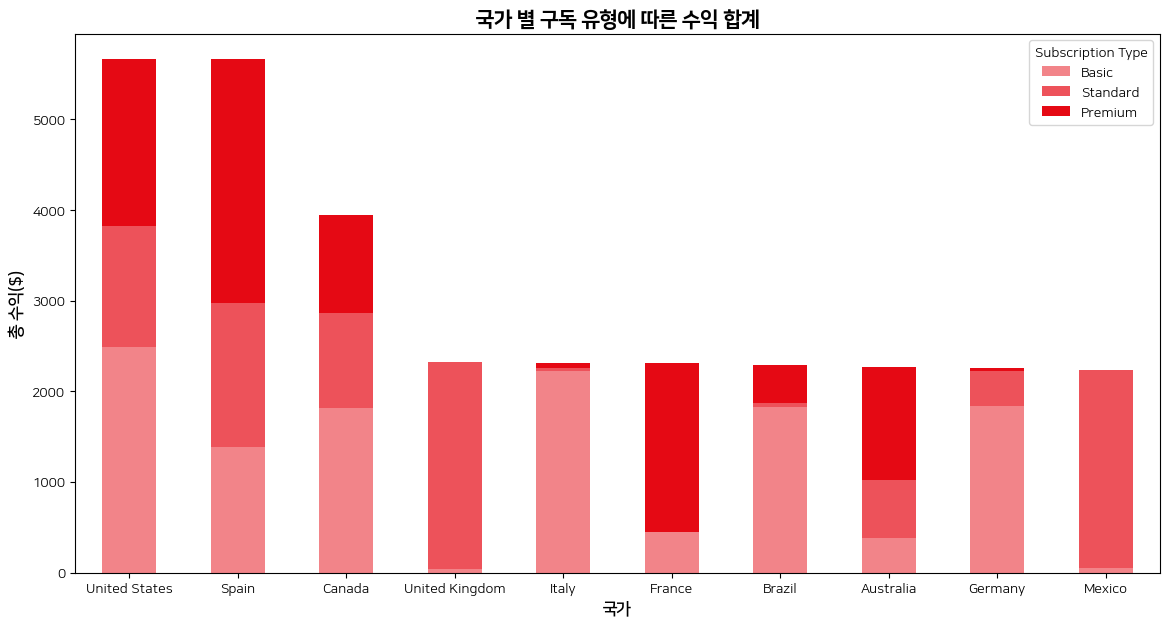

In [237]:
# 그래프 그리기
revenue_by_country.plot(
    kind='bar',
    y=['Basic', 'Standard', 'Premium'], #Sum은 포함하지 않음
    color=['#F28489', '#ED525A', '#E50914'],
    stacked=True,
    figsize=(14, 7)
)

# 시각화 설정
plt.title('국가 별 구독 유형에 따른 수익 합계', fontsize=15, fontweight=900)
plt.ylabel('총 수익($)', fontsize=12, fontweight='bold')
plt.xlabel('국가', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

### 5-3. 수익률 당 가입자 수

3가지 구독 유형 상품(Basic, Premium, Standard)의 수익성을 파악하는 지표로 '수익률 당 가입자 수'를 고려할 수 있다. 수입률 당 가입자 수는 각 구독 유형에 대한 가입자 수를 결제 당 수익으로 나눈 값이다.

수익률 당 가입자 수 $r$는 전체 가입자 수(Count) $c$, 전체 수익(Revenue) $p$에 대하여
$$r = {n^2 \over p}$$
라고 정의한다.

수익률 당 가입자 수 지표는 다음과 같이 해석할 수 있다.
- 수익률 당 가입자 수가 낮다면, 아직까지는 **많은 판매가 이루어지지 않은 상품**이다. 아직 인지도가 낮거나, 유저의 만족도가 낮은 상품으로 이해할 수 있다.
    - 전자의 경우 해당 상품에 대한 마케팅을 추진했을 때의 잠재성이 높다고 생각할 수 있다.
    - 후자의 경우 해당 상품에 대한 개선 방안을 도출해 내어 유저의 만족도를 끌어올려야 할 것이다.
- 수익률 당 가입자 수가 높다면, **이미 많은 판매량을 기록하고 있는 효자 상품**이다. 이미 유저 만족도가 높아서 다수의 지지를 받고 있다.

In [269]:
# 국가 별 구독 유형에 따른 가입자 수 도출
count_by_country_df = netflix_df.groupby(['Country', 'Subscription Type']).agg({
    'Monthly Revenue': 'count'
}).unstack(fill_value=0)['Monthly Revenue']

# 국가 별 구독 유형에 따른 수익 합계 도출
sum_by_country_df = netflix_df.groupby(['Country', 'Subscription Type']).agg({
    'Monthly Revenue': 'sum'
}).unstack(fill_value=0)['Monthly Revenue']

# 국가 별 수익률(결제 당 수익) 도출
revenue_rate_df = sum_by_country_df / count_by_country_df
revenue_rate_df[revenue_rate_df.isna()] = 0 #null 값 채우기

revenue_rate_df

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,12.193548,12.415842,12.529412
Brazil,12.493151,12.424242,12.750000
Canada,12.524138,12.340909,12.476190
France,12.361111,12.666667,NaN
Germany,12.302013,12.000000,12.612903
Italy,12.630682,13.750000,13.000000
Mexico,11.500000,NaN,12.240223
Spain,12.600000,12.683962,12.302326
United Kingdom,11.666667,NaN,12.683333


In [273]:
# 국가 별 구독 유형에 따른 수익률(결제 당 수익) 당 가입자 수 도출
count_by_revenue_rate_df = count_by_country_df / revenue_rate_df
count_by_revenue_rate_df[count_by_revenue_rate_df.isna()] = 0 #null 값 채우기

# 순서 정렬
custom_col_order = ['Basic', 'Standard', 'Premium'] #요금제 가격 순
count_by_revenue_rate_df = count_by_revenue_rate_df[custom_col_order]
custom_row_order = list(countries_df.index)
count_by_revenue_rate_df = count_by_revenue_rate_df.reindex(custom_row_order)

count_by_revenue_rate_df

Subscription Type,Basic,Standard,Premium
Country,,,
Spain,8.730159,10.485822,16.714020
United States,15.948852,8.518601,11.445291
Canada,11.577643,6.732824,7.130755
Australia,2.542328,4.070423,8.134769
Brazil,11.686404,0.313725,2.656098
France,2.912360,0.000000,11.605263
Germany,12.111839,2.457801,0.250000
Italy,13.934323,0.230769,0.290909
Mexico,0.347826,14.623916,0.000000


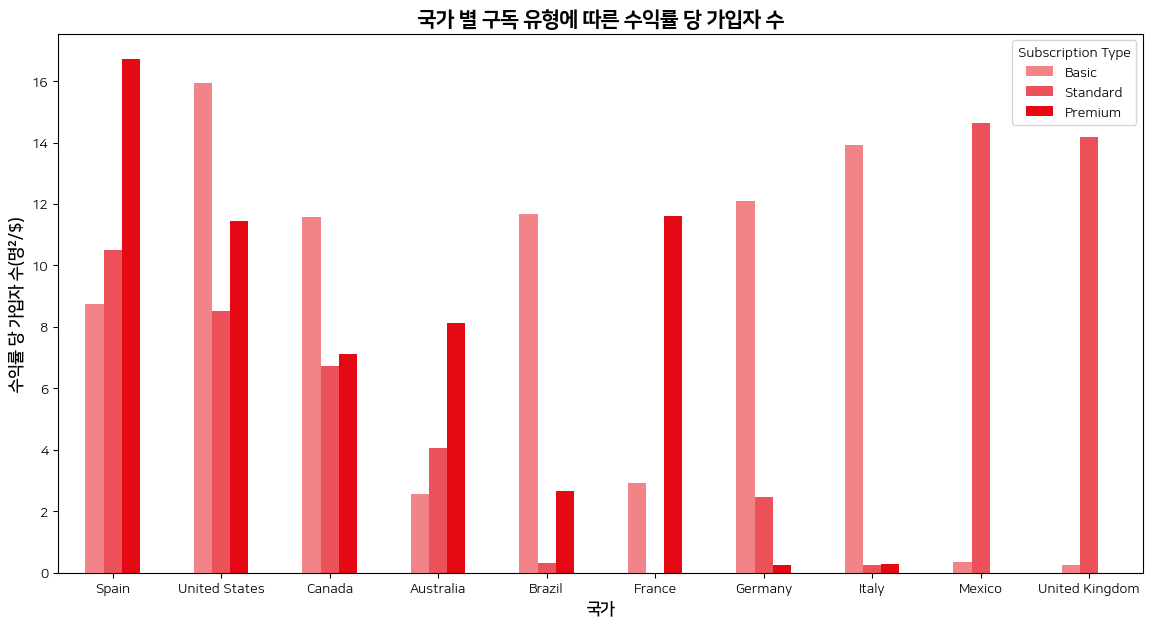

In [275]:
# 그래프 그리기
count_by_revenue_rate_df.plot(kind='bar', color=['#F28489', '#ED525A', '#E50914'], figsize=(14, 7))

# 시각화 설정
plt.title('국가 별 구독 유형에 따른 수익률 당 가입자 수', fontsize=15, fontweight=900)
plt.ylabel('수익률 당 가입자 수(명²/$)', fontsize=12, fontweight='bold')
plt.xlabel('국가', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)

plt.show()

스페인, 미국, 캐나다, 호주 등은 각 구독 유형에 대한 지표가 비교적 균등하게 분포하고 있는 국가들이다. 이 경우에 대한 해석은 두 가지로 생각해 볼 수 있다.

- 유저가 합리적이라고 생각하는 선택 폭이 다양하게 갖춰져 있다. 비교적 열세로 평가되는 상품 역시 상황에 따라 충분히 합리적으로 여겨질 수 있다는 의미이다. 예를 들어 스페인에서는 Premium 요금제가 가장 높은 선호도를 가지고 있지만, Basic과 Standard 역시 유저의 상황에 따라 제한적으로 고려 가능한 선택지이다.
- 매력적인 상품이지만 유저에게 충분히 소구되고 있지 않다. 예를 들어 미국에서는 3가지 요금제 중 Basic이 가장 높은 지표로 나타나고 Premium 역시 인상적으로 보이지만, 이들 둘에 비해 Standard 요금제가 덜 알려져 있을 수 있다.

이상의 분석을 토대로 어떤 구독 유형 상품을 집중적으로 포커싱해야 할지를 결정해야 할 수 있다. 지표가 낮은 상품 역시 충분히 경쟁력 있다고 생각되는 경우 유저들에게 해당 상품을 더욱 노출하여 **수익 잠재성을 끌어올리는 방향성**이 가장 유리할 것이다.

브라질, 프랑스, 독일, 이탈리아, 멕시코, 영국 등에서는 특정한 구독 유형이 독보적인 추이를 보인다. 이 경우 다음과 같은 해석이 가능하다.

- 1개 또는 2개의 우세한 상품 외 나머지 상품들의 유저 만족도가 매우 낮다. 사실상 버리는 상품에 가깝다고 봐도 무방할 정도로 상품에 대한 인식이 형편없다.

지표가 뒤처진 상품의 경우 특정한 이유로 이미 유저들에 의해 배제된 것이기 때문에, **가장 우세한 상품을 더욱 심화**하는 방향성이 합리적일 것이다.

## 6. 후기

넷플릭스 구독 데이터를 통해 현재 세 가지 구독 플랜들 사이의 우열을 따져보고, 이를 바탕으로 각 국가 별로 현지화 전략을 어떻게 채택하면 좋을지도 생각해 보았다. 사실 이번 분석의 핵심은 **새로운 지표의 발굴**이었다. 표면적으로는 큰 차이가 드러나지 않는 데이터들 사이에서 어떤 방식으로 인사이트를 뽑아내면 좋을지를 고민했고, 그 결과 수익률과 유저 수를 이용하는 나만의 지표를 만들어 분석에 적용할 수 있었다.